#  Data Analysis
Importing the libraries

In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score


# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
#from sklearn.externals import joblib
import joblib

In [2]:
np.set_printoptions(precision=2, suppress=True)

##  Reading the data

In [3]:
df = pd.read_csv("Files/employee_data.csv")

In [4]:
# Dataframe dimensions
df.shape

(14249, 10)

In [5]:
# Columns of the dataframe
df.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure'],
      dtype='object')

In [6]:
# First 5 rows
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [7]:
# Column datatypes
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

Make sure all the data types make sense and none seems incorrect

In [8]:
# Last 5 rows
df.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


##  Distribution of numeric features

array([[<AxesSubplot:title={'center':'avg_monthly_hrs'}>,
        <AxesSubplot:title={'center':'filed_complaint'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>],
       [<AxesSubplot:title={'center':'n_projects'}>,
        <AxesSubplot:title={'center':'recently_promoted'}>,
        <AxesSubplot:title={'center':'satisfaction'}>],
       [<AxesSubplot:title={'center':'tenure'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

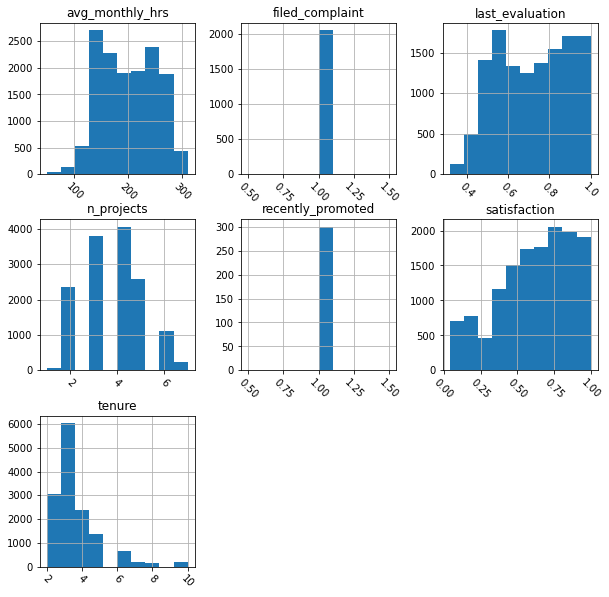

In [9]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45)

<AxesSubplot:xlabel='avg_monthly_hrs', ylabel='Density'>

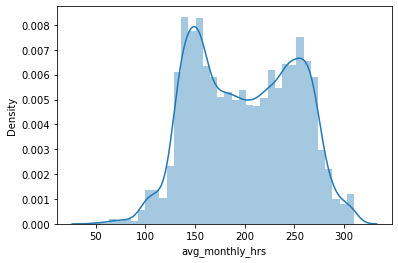

In [10]:
sns.distplot(df['avg_monthly_hrs'])

In [11]:
# Summarize numerical features
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


## Distribution of categorical features

In [12]:
# Summarize categorical features

df.describe(include=['object'])

,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


<AxesSubplot:xlabel='count', ylabel='department'>

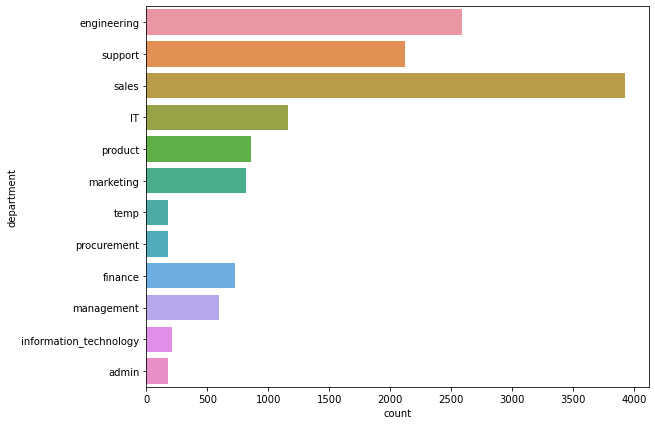

In [13]:
## We can also use bar plots instead
plt.figure(figsize=(9,7))
sns.countplot(y='department', data=df)

In [14]:
df['salary'].value_counts()

low       6952
medium    6146
high      1151
Name: salary, dtype: int64

In [15]:
df['status'].value_counts()

Employed    10857
Left         3392
Name: status, dtype: int64

## Segmentations

<AxesSubplot:xlabel='satisfaction', ylabel='status'>

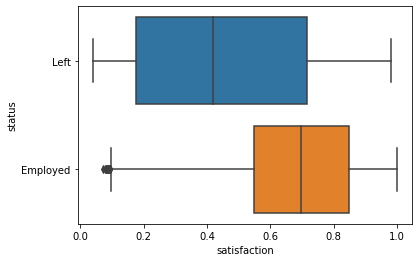

In [16]:
## status vs satisfaction
sns.boxplot(y='status', x='satisfaction', data=df)

<AxesSubplot:xlabel='last_evaluation', ylabel='status'>

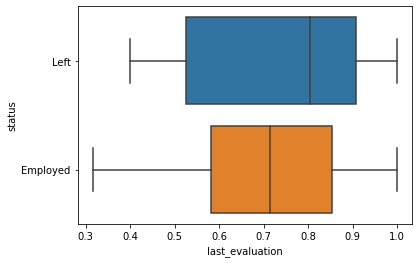

In [17]:
## status vs last_evaluation
sns.boxplot(y='status', x='last_evaluation', data=df)

In [18]:
# Segment by status and display the means within each class
df.groupby('status').mean()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
status,,,,,,,
Employed,197.700286,1.0,0.714479,3.755273,1.0,0.675979,3.380245
Left,206.502948,1.0,0.730706,3.833137,1.0,0.447500,3.869023


### Bivariate segmentations

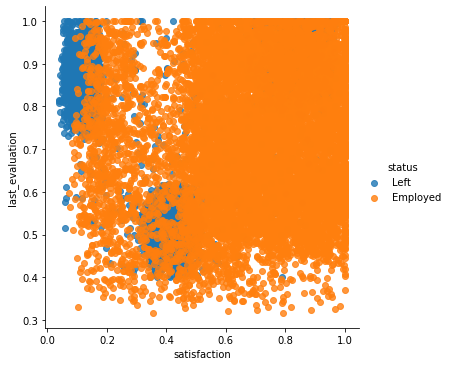

In [19]:
# Scatterplot of satisfaction vs. last_evaluation
sns.lmplot(x='satisfaction', y='last_evaluation', hue='status', data=df, fit_reg=False)

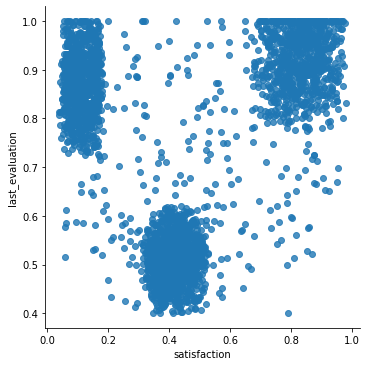

In [20]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df.status == 'Left'], fit_reg=False)

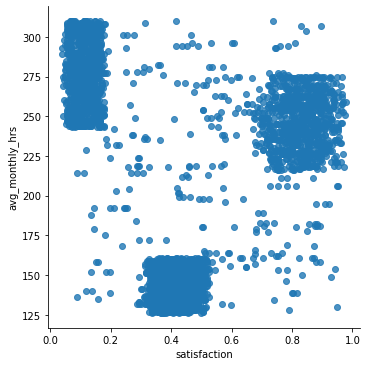

In [21]:
# Scatterplot of satisfaction vs. avg_monthly_hrs, only those who have left
sns.lmplot(x='satisfaction', y='avg_monthly_hrs', data=df[df.status == 'Left'], fit_reg=False)

In [22]:
df.corr()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
avg_monthly_hrs,1.000000,NaN,0.340136,0.443221,NaN,-0.019622,0.124954
filed_complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_evaluation,0.340136,NaN,1.000000,0.345590,NaN,0.089189,0.132100
n_projects,0.443221,NaN,0.345590,1.000000,NaN,-0.143514,0.192653
recently_promoted,NaN,NaN,NaN,NaN,NaN,NaN,NaN
satisfaction,-0.019622,NaN,0.089189,-0.143514,NaN,1.000000,-0.097301
tenure,0.124954,NaN,0.132100,0.192653,NaN,-0.097301,1.000000


<AxesSubplot:>

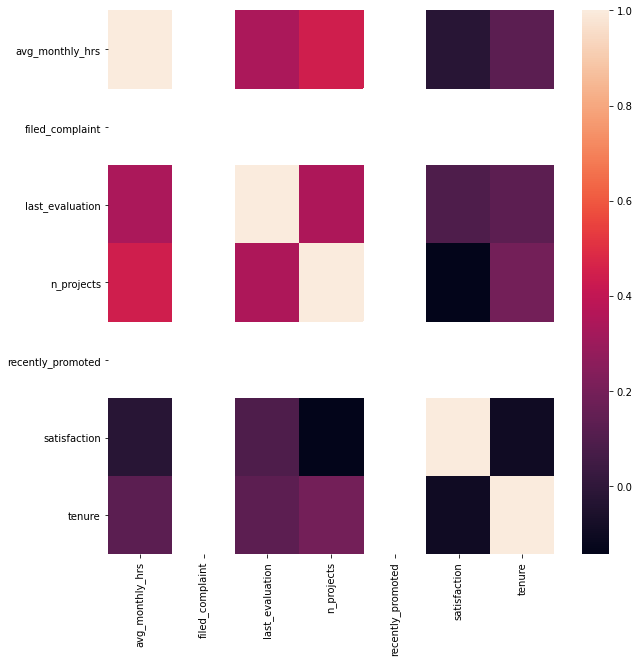

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

# 4. Data Cleaning
De-duplication and dropping unwanted observations

In [24]:
print(df.shape)

(14249, 10)


In [25]:
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(14221, 10)


In [26]:
# Drop temporary workers
df = df[df.department != 'temp']
print(df.shape)

(14068, 10)


## Fix structural errors

In [27]:
# Print unique values of 'filed_complaint'
print( df.filed_complaint.unique() )

# Print unique values of 'recently_promoted'
print( df.recently_promoted.unique() )

[nan  1.]
[nan  1.]


In [28]:
# Missing filed_complaint values should be 0
df['filed_complaint'] = df.filed_complaint.fillna(0)

# Missing recently_promoted values should be 0
df['recently_promoted'] = df.recently_promoted.fillna(0)

In [29]:
## Sanity check

# Print unique values of 'filed_complaint'
print( df.filed_complaint.unique() )

# Print unique values of 'recently_promoted'
print( df.recently_promoted.unique() )

[0. 1.]
[0. 1.]


## Typos and capitalization

<AxesSubplot:xlabel='count', ylabel='department'>

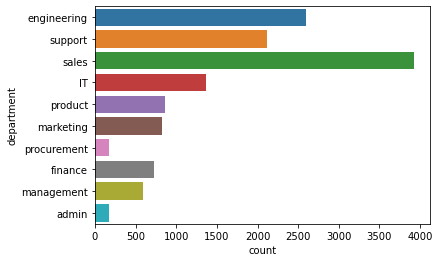

In [30]:
# 'information_technology' should be 'IT'
df.department.replace('information_technology', 'IT', inplace=True)

# Plot class distributions for 'department'
sns.countplot(y='department', data=df)

## Missing Data

In [31]:
# +
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [32]:
# Fill missing values in department with 'Missing'
# Equivalent to adding a new class
df['department'].fillna('Missing', inplace=True)

In [33]:
# Indicator variable for missing last_evaluation
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

Then, simply fill in the original missing value with 0 just so your algorithms can run properly.

In [34]:
# Fill missing values in last_evaluation with 0
df.last_evaluation.fillna(0, inplace=True)

Display the number of missing values for each feature (both categorical and numeric) again, just to confirm.

In [35]:
# Display number of missing values by feature
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

## Indicator Variables


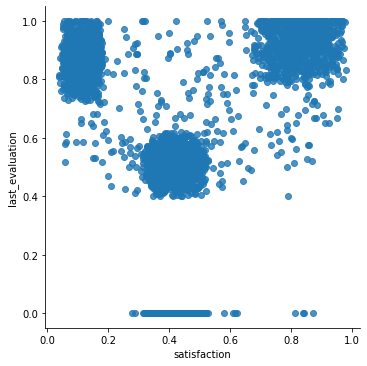

In [36]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df.status == 'Left'], fit_reg=False)

In [37]:
# Create indicator features
df['underperformer'] = ((df.last_evaluation < 0.6) & 
                        (df.last_evaluation_missing == 0)).astype(int)

df['unhappy'] = (df.satisfaction < 0.2).astype(int)

df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction > 0.7)).astype(int)

In [38]:
# The proportion of observations belonging to each group
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

** Finally convert 'status' (target variable) into a binary indicator variable.**
* 'Left' should be 1
* 'Employed' should be 0

In [39]:
# Convert status to an indicator variable
df['status'] = pd.get_dummies( df.status ).Left

To confirm we did that correctly, display the proportion of people in our dataset who left.

In [40]:
# The proportion of observations who 'Left'
df.status.mean()

0.23933750355416547

Matches with the earlier count. Seems good

## Encoding 

In [41]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['department', 'salary'])

# Display first 10 rows
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,1,...,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [42]:
# Save analytical base table
df.to_csv('Files/analytical_base_table.csv', index=None)

# Machine Learning Models

In [43]:
df = pd.read_csv("Files/analytical_base_table.csv")

In [44]:
print(df.shape)

(14068, 26)


### Train test split

In [45]:
# Create separate object for target variable
y = df.status

# Create separate object for input features
X = df.drop('status', axis=1)

In [46]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.status)



In [47]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11254, 25) (2814, 25) (11254,) (2814,)


In [48]:
print(y_test)
y_test.describe()

9021     0
9838     0
8879     0
10454    0
8485     0
        ..
6538     0
10181    0
3148     0
6778     0
6936     1
Name: status, Length: 2814, dtype: int64


count    2814.000000
mean        0.239161
std         0.426647
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: status, dtype: float64

### Data standardization

In [49]:
train_mean = X_train.mean()
train_std = X_train.std()

In [50]:
## Save these mean and std dev values
train_mean.to_pickle("Save/train_mean.pkl")
train_std.to_pickle("Save/train_std.pkl")

In [51]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [52]:
## Check for mean and std dev.
X_train.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,underperformer,unhappy,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
count,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,...,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04,1.125400e+04
mean,-1.410518e-16,-7.124507e-16,4.938860e-15,3.868467e-16,-1.181962e-15,-8.718408e-15,-2.701076e-16,3.084238e-16,-4.519616e-16,3.725965e-16,...,4.899375e-16,-1.424995e-15,-7.675820e-16,4.087597e-16,-4.383181e-16,1.926662e-16,1.515897e-15,-5.810174e-16,9.154851e-18,-6.200241e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.097551e+00,-4.066418e-01,-2.417939e+00,-1.455347e+00,-1.457128e-01,-2.327064e+00,-1.024920e+00,-3.267968e-01,-6.344341e-01,-3.151772e-01,...,-2.366739e-01,-2.160667e-01,-2.467631e-01,-1.110062e-01,-2.543731e-01,-6.223287e-01,-4.182927e-01,-2.983599e-01,-9.767671e-01,-8.684807e-01
25%,-9.142094e-01,-4.066418e-01,-4.586632e-01,-6.436473e-01,-1.457128e-01,-6.841787e-01,-3.396507e-01,-3.267968e-01,-6.344341e-01,-3.151772e-01,...,-2.366739e-01,-2.160667e-01,-2.467631e-01,-1.110062e-01,-2.543731e-01,-6.223287e-01,-4.182927e-01,-2.983599e-01,-9.767671e-01,-8.684807e-01
50%,-3.171743e-02,-4.066418e-01,1.388747e-01,1.680522e-01,-1.457128e-01,1.210881e-01,-3.396507e-01,-3.267968e-01,-6.344341e-01,-3.151772e-01,...,-2.366739e-01,-2.160667e-01,-2.467631e-01,-1.110062e-01,-2.543731e-01,-6.223287e-01,-4.182927e-01,-2.983599e-01,-9.767671e-01,-8.684807e-01
75%,8.908879e-01,-4.066418e-01,7.816106e-01,9.797517e-01,-1.457128e-01,8.126088e-01,3.456181e-01,-3.267968e-01,1.576068e+00,-3.151772e-01,...,-2.366739e-01,-2.160667e-01,-2.467631e-01,-1.110062e-01,-2.543731e-01,1.606725e+00,-4.182927e-01,-2.983599e-01,1.023695e+00,1.151334e+00
max,2.194569e+00,2.458948e+00,1.311132e+00,2.603151e+00,6.862203e+00,1.518713e+00,4.457231e+00,3.059733e+00,1.576068e+00,3.172536e+00,...,4.224847e+00,4.627788e+00,4.052110e+00,9.007706e+00,3.930883e+00,1.606725e+00,2.390458e+00,3.351360e+00,1.023695e+00,1.151334e+00


In [53]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [54]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,last_evaluation_missing,underperformer,unhappy,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
count,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,...,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000
mean,0.050369,0.029205,0.020064,0.032769,0.018652,0.007616,0.005419,-0.007881,-0.019358,0.031859,...,-0.028977,-0.055982,0.017524,0.008892,0.007391,-0.003675,0.026875,-0.010429,0.001426,0.004332
std,1.009275,1.029258,0.999263,1.016184,1.060773,1.017268,1.005757,0.989272,0.990786,1.044182,...,0.940117,0.866064,1.032797,1.038904,1.013605,0.998316,1.025946,0.984026,1.000166,1.000736
min,-2.077494,-0.406642,-2.417939,-1.455347,-0.145713,-2.326534,-1.024920,-0.326797,-0.634434,-0.315177,...,-0.236674,-0.216067,-0.246763,-0.111006,-0.254373,-0.622329,-0.418293,-0.298360,-0.976767,-0.868481
25%,-0.854040,-0.406642,-0.447861,-0.643647,-0.145713,-0.671221,-0.339651,-0.326797,-0.634434,-0.315177,...,-0.236674,-0.216067,-0.246763,-0.111006,-0.254373,-0.622329,-0.418293,-0.298360,-0.976767,-0.868481
50%,0.048509,-0.406642,0.195125,0.168052,-0.145713,0.149043,-0.339651,-0.326797,-0.634434,-0.315177,...,-0.236674,-0.216067,-0.246763,-0.111006,-0.254373,-0.622329,-0.418293,-0.298360,-0.976767,-0.868481
75%,0.925987,-0.406642,0.785055,0.979752,-0.145713,0.834208,0.345618,-0.326797,1.576068,-0.315177,...,-0.236674,-0.216067,-0.246763,-0.111006,-0.254373,1.606725,-0.418293,-0.298360,1.023695,1.151334
max,2.194569,2.458948,1.311132,2.603151,6.862203,1.518713,4.457231,3.059733,1.576068,3.172536,...,4.224847,4.627788,4.052110,9.007706,3.930883,1.606725,2.390458,3.351360,1.023695,1.151334


## Model Random Forest

In [55]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [56]:
model.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300)

In [57]:
y_train_pred = model.predict(X_train)

In [58]:
y_pred = model.predict(X_test)

In [59]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [60]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.01, 0.  , 0.05, 0.01, 0.15, 0.05, 0.69, 0.98, 0.99, 0.  ])

**Note:** Just as above, we can use these probabilities for model interpretation

In [61]:
confusion_matrix(y_test, y_pred).T

array([[2131,   60],
       [  10,  613]], dtype=int64)

In [62]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

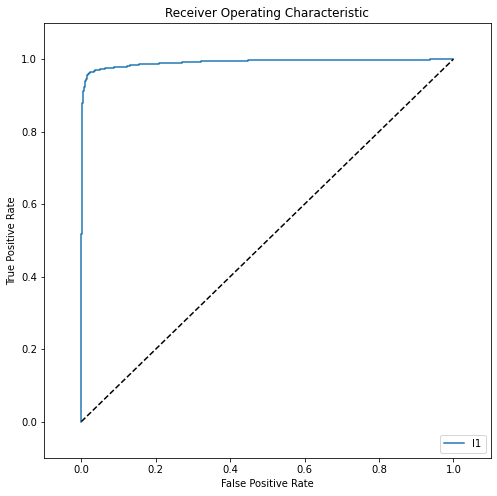

In [63]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
# Calculate AUC for Train set
roc_auc_score(y_train, y_train_pred)

0.9723120433778074

In [65]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.9911707531371171


#### Feature Importance

In [66]:
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [67]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
satisfaction
n_projects
tenure
avg_monthly_hrs
last_evaluation
unhappy
overachiever
underperformer
filed_complaint
salary_low
salary_high
department_engineering
department_sales
salary_medium
department_support
last_evaluation_missing
department_IT
department_finance
department_management
department_Missing
recently_promoted
department_product
department_marketing
department_admin
department_procurement


## Model- XGBoost

In [68]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

[12:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=N

In [69]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0.001, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
y_train_pred = model.predict(X_train)

In [71]:
y_pred = model.predict(X_test)

In [72]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [73]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.  , 0.01, 0.02, 0.  , 0.11, 0.01, 0.99, 0.99, 1.  , 0.  ],
      dtype=float32)

**Note:** Just as above we can use these probabilities to get model interpretation

In [74]:
confusion_matrix(y_test, y_pred).T

array([[2123,   49],
       [  18,  624]], dtype=int64)

In [75]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

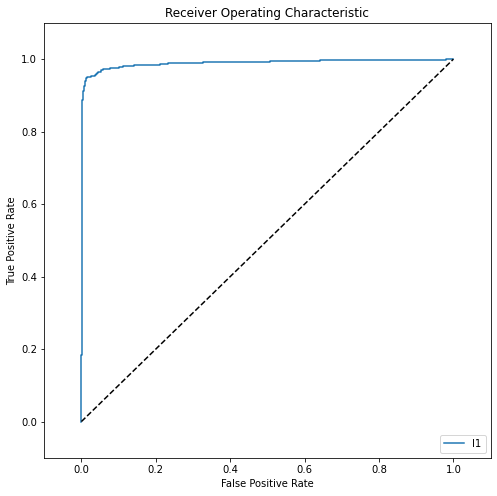

In [76]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [77]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.9843655249810933

In [78]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.9891005091981153


#### Feature Importance

In [79]:
model = XGBClassifier(max_depth=5,learning_rate=0.05,n_estimators=400, reg_lambda=0.001)
model.fit(X_train, y_train)

[12:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0.001, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

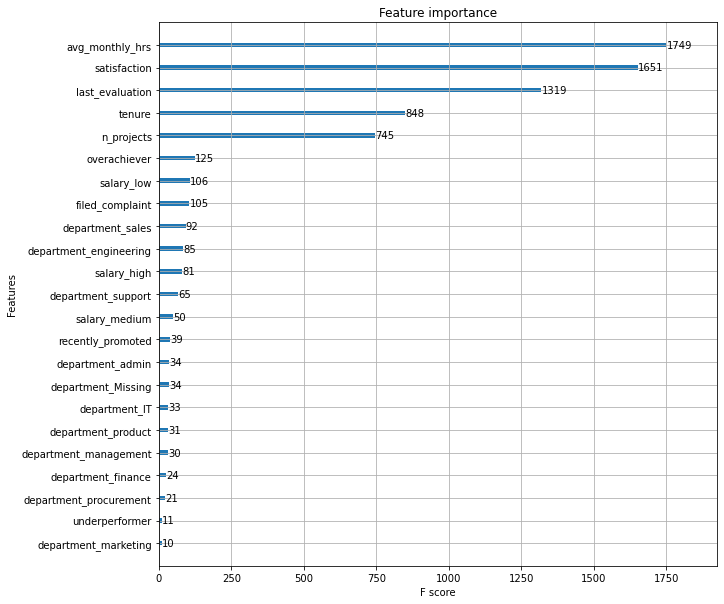

In [81]:
my_plot_importance(model, (10,10))

# Model- KNN

In [82]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 1.


In [83]:
MSE.index(min(MSE))

0

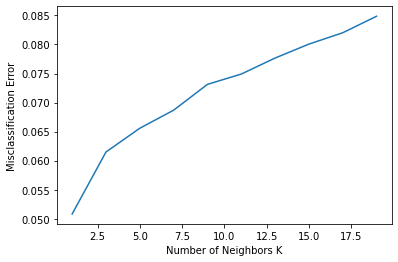

In [84]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [85]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [86]:
y_pred = classifier.predict(X_test)


In [87]:
y_train_pred = classifier.predict(X_train)

In [88]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
acc

96.55294953802417

In [89]:
cnf=confusion_matrix(y_test,y_pred).T
cnf

array([[2081,   37],
       [  60,  636]], dtype=int64)

In [90]:
# Get just the prediction for the positive class (1)
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [91]:
# Display first 10 predictions
y_pred_proba[:10]

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 0.])

In [92]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

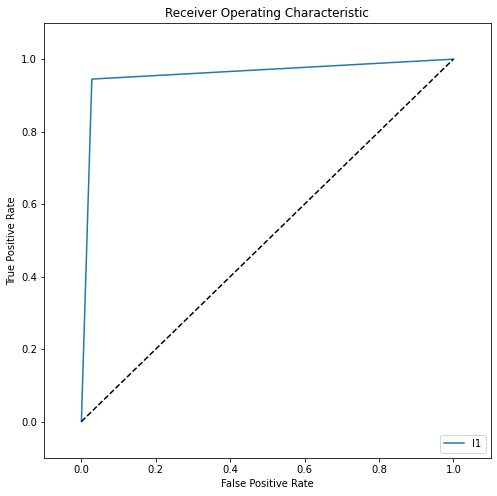

In [93]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [94]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

1.0

In [95]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.9584990002727476


## Model Descision Trees

In [96]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [97]:
model.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=3)

In [98]:
y_train_pred = model.predict(X_train)

In [99]:
y_pred = model.predict(X_test)

In [100]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [101]:
y_pred_proba[:10]

array([0.03, 0.01, 0.02, 0.01, 0.03, 0.01, 0.97, 0.99, 0.99, 0.01])

In [102]:
confusion_matrix(y_test, y_pred).T

array([[2121,   66],
       [  20,  607]], dtype=int64)

In [103]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

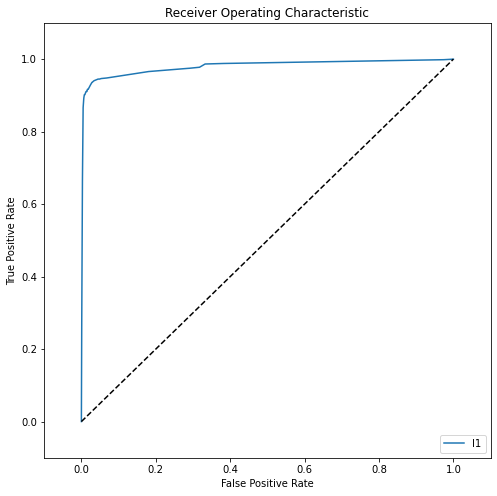

In [104]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [105]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.9548875486543306

In [106]:
print(auc(fpr, tpr))

0.9799093340032884


#### Feature Importance

In [107]:
## Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=7, min_samples_leaf=1, max_depth=7)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=7)

In [108]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
satisfaction
avg_monthly_hrs
tenure
n_projects
overachiever
last_evaluation
salary_low
department_engineering
department_IT
salary_high
last_evaluation_missing
department_Missing
department_admin
department_support
underperformer
recently_promoted
department_finance
department_management
department_marketing
department_procurement
department_product
department_sales
filed_complaint
unhappy
salary_medium


## Model SVM

In [109]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [110]:
svClassifier=SVC(kernel='rbf',probability=True)
svClassifier.fit(X_train,y_train)

SVC(probability=True)

In [111]:
svc_param_selection(X_train,y_train,5)

{'C': 10, 'gamma': 1}

In [112]:
###### Building the model again with the best hyperparameters
model = SVC(C=10, gamma=1)
model.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [113]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [114]:
## Predict Test results
y_pred = model.predict(X_test)

In [115]:
confusion_matrix(y_test, y_pred).T

array([[2113,   44],
       [  28,  629]], dtype=int64)

In [116]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

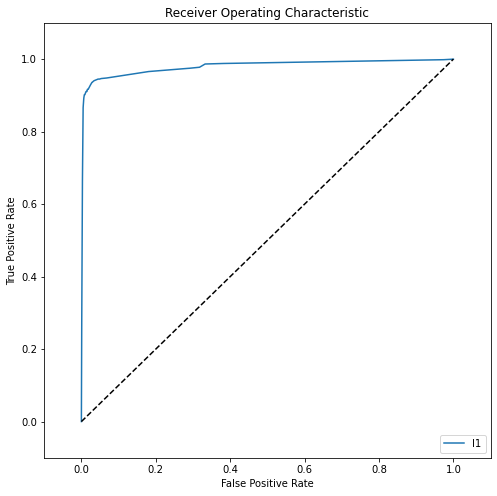

In [117]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.9946902167502722

In [119]:
print(auc(fpr, tpr))

0.9799093340032884


In [120]:
from sklearn.gaussian_process import GaussianProcessClassifier
X_train=X_train[0:10000]
y_train=y_train[0:10000]

In [121]:
#if (CONFIG['GAUSSIAN_PROCESS_CLASSIFICATION']):
results = GaussianProcessClassifier().fit(X_train,y_train)

In [125]:
pro_retetion_employee = results.predict_proba(X_test[y_test == 0])[:, 0]
pro_not_retetion_employee = results.predict_proba(X_test[y_test == 1])[:, 0]
print(retetion_employee.shape)
print(not_retetion_employee.shape)

(2141,)
(673,)


In [126]:
retetion_employee = X_test.loc[y_test == 0].index.values
not_retetion_employee = X_test.loc[y_test == 1].index.values

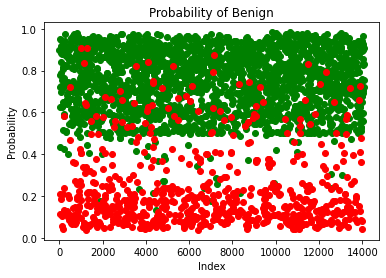

In [128]:
import matplotlib.pyplot as pyplot

pyplot.scatter(retetion_employee, pro_retetion_employee, c = 'green')
pyplot.scatter(not_retetion_employee, pro_not_retetion_employee, c = 'red')
pyplot.title('Probability of Benign')
pyplot.xlabel('Index')
pyplot.ylabel('Probability')
pyplot.show()

#### Unfortunately getting feature importance from RBF SVM is non trivial

# Compare all models

![result](Result.png)